In [ ]:
from obspy import read, UTCDateTime
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import pywt 
from scipy import stats
import scipy 
import pandas as pd
import os


In [5]:
# Leer datos del csv
df = pd.read_csv("/mnt/c/Users/Usuario/Documents/Studies/GicoProject/SismicWaves/data/raw/VT_P_training.csv")
df.head()

,eve_fecha,archivo,lec_p
0,2024-04-01 03:55:42.000,4010355,1.711944e+09
1,2024-04-01 09:19:05.000,4010919,1.711963e+09
2,2024-04-01 09:36:45.000,4010936,1.711964e+09
3,2024-04-01 17:49:27.000,4011749,1.711994e+09
4,2024-04-02 01:30:23.000,4020130,1.712021e+09


In [6]:
file_name = 4010355
p_time = UTCDateTime(float(df.loc[df['archivo'] == file_name, 'lec_p'].values[0]))
print(p_time)

2024-04-01T03:55:51.400000Z


In [7]:
# Leer y normalizar la señal sismica 
st = read(f"/mnt/c/Users/Usuario/Documents/Studies/GicoProject/SismicWaves/data/raw/train/0{file_name}.mseed")
tr = st[0]
data_normalized = (tr.data - np.mean(tr.data)) / np.std(tr.data)

In [8]:
# Configuración de tiempo 
start_time = tr.stats.starttime
samplig_rate = tr.stats.sampling_rate
npts = tr.stats.npts
times_relative = np.arange(0, npts) / samplig_rate

arrival_seconds = p_time - start_time


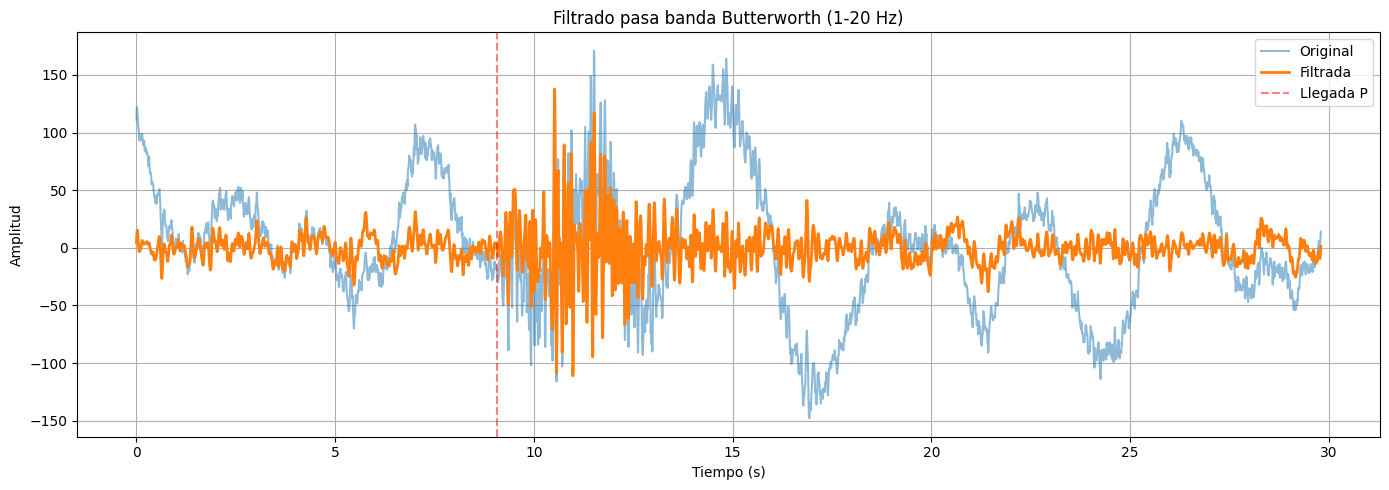

In [9]:
# Quitar el ruido de las señales
def bandpass_filter(signal, fs, lowcut=1.0, highcut=20.0, order=4):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = scipy.signal.butter(order, [low, high], btype='band')
    y = scipy.signal.filtfilt(b, a, signal)
    return y

raw_signal = tr.data
fs = tr.stats.sampling_rate

# Aplicar el filtro 
filtered_signal = bandpass_filter(raw_signal, fs, lowcut=0.5, highcut=20.0)


plt.figure(figsize=(14, 5))
plt.plot(times_relative, raw_signal, label='Original', alpha=0.5)
plt.plot(times_relative, filtered_signal, label='Filtrada', linewidth=2)
plt.axvline(x=arrival_seconds, color='r', linestyle='--', label='Llegada P', alpha=0.5)
plt.title("Filtrado pasa banda Butterworth (1-20 Hz)")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()




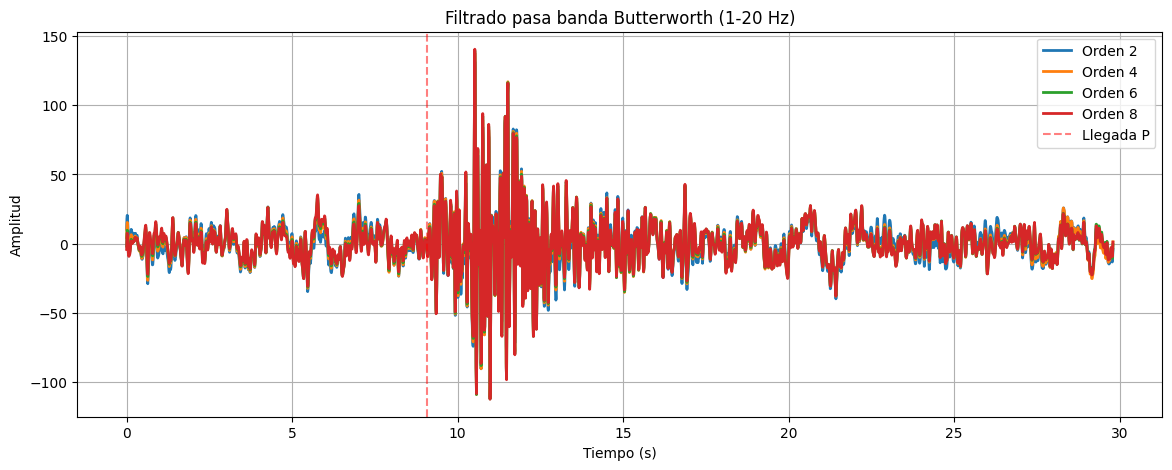

In [10]:
# Graficar la señal con diferentes orden es de Butterworth
order = [2, 4, 6, 8]
plt.figure(figsize=(14, 5))
for i in order:
    filtered_signal = bandpass_filter(raw_signal, fs, lowcut=0.5, highcut=20.0, order=i)
    plt.plot(times_relative, filtered_signal, label=f'Orden {i}', linewidth=2)
plt.axvline(x=arrival_seconds, color='r', linestyle='--', label='Llegada P', alpha=0.5)
plt.title("Filtrado pasa banda Butterworth (1-20 Hz)")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)

In [ ]:
# Función para guardar gráficos
def save_plot(fig, filename):
    output_dir = 'output_figures'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    filepath = os.path.join(output_dir, filename)
    fig.savefig(filepath, dpi=300, bbox_inches='tight')
    print(f'Gráfico guardado en: {filepath}')

In [ ]:
# Graficar y guardar la señal original con tiempo de llegada
fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(times_relative, raw_signal, label='Original')
ax.axvline(x=arrival_seconds, color='r', linestyle='--', label='Llegada P', alpha=0.5)
ax.set_title('Señal Sísmica Original')
ax.set_xlabel('Tiempo (s)')
ax.set_ylabel('Amplitud')
ax.legend()
ax.grid(True)
plt.tight_layout()
save_plot(fig, 'senal_original.png')
plt.show()

In [ ]:
# Graficar y guardar la señal filtrada
fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(times_relative, raw_signal, label='Original', alpha=0.5)
ax.plot(times_relative, filtered_signal, label='Filtrada', linewidth=2)
ax.axvline(x=arrival_seconds, color='r', linestyle='--', label='Llegada P', alpha=0.5)
ax.set_title('Filtrado pasa banda Butterworth (1-20 Hz)')
ax.set_xlabel('Tiempo (s)')
ax.set_ylabel('Amplitud')
ax.legend()
ax.grid(True)
plt.tight_layout()
save_plot(fig, 'senal_filtrada.png')
plt.show()

In [ ]:
# Graficar y guardar comparación de órdenes de filtro
fig, ax = plt.subplots(figsize=(14, 5))
for i in order:
    filtered_signal = bandpass_filter(raw_signal, fs, lowcut=0.5, highcut=20.0, order=i)
    ax.plot(times_relative, filtered_signal, label=f'Orden {i}', linewidth=2)
ax.axvline(x=arrival_seconds, color='r', linestyle='--', label='Llegada P', alpha=0.5)
ax.set_title('Comparación de órdenes del filtro Butterworth (1-20 Hz)')
ax.set_xlabel('Tiempo (s)')
ax.set_ylabel('Amplitud')
ax.legend()
ax.grid(True)
plt.tight_layout()
save_plot(fig, 'comparacion_ordenes.png')
plt.show()